<span style="font-size:40px; font-weight:bold;">SpaceX Falcon 9 first stage Landing Prediction</span>


# Dataset

The capstone project aims to predict if the Falcon 9 first stage will successfully land. Successful landings are crucial for cost savings in SpaceX launches, making them more affordable than other providers. The prediction outcome is valuable for estimating launch costs and competing bids against SpaceX. The project involves data collection and formatting from an API, with success determined by achieving a successful launch.






In [205]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns



In [206]:
df = pd.read_csv("dataset_part_1.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [207]:
# Filter the dataframe to only include Falcon 9 launches
data_falcon9 = df[df['BoosterVersion']=='Falcon 9']
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [208]:
#reset the FlightNumber column to start from 1.
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


# Data Wrangling


In [209]:
data_falcon9.isnull().sum()
#data_falcon9.dropna(subset=['LandingPad'], inplace=True)


FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

## Dealing with missing value

In [210]:
#Calculate below the mean for the PayloadMass using the .mean(). Then use the mean and the .replace() function to replace np.nan values in the data with the mean you calculated.


payload_mean = data_falcon9['PayloadMass'].mean()
data_falcon9['PayloadMass'].replace(np.nan, payload_mean, inplace= True)

In [211]:
data_falcon9.isnull().sum()


FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

Missing data in the "LandingPad" column can be due to various reasons such as no landing attempt, ocean landings without a fixed pad, data collection practices, technical issues, or human error during recording. Handling options include imputation, data exploration, leveraging domain knowledge, and communication with data providers.






In [212]:
df.dtypes


FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [213]:
# Calculate the number of launches on each site
df['LaunchSite'].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In space exploration, each launch is designed to reach a specific orbit, and several common orbit types exist, each serving different purposes:



<b>LEO (Low Earth Orbit):</b> Orbits with an altitude of 2,000 km or less, or with at least 11.25 periods per day and an eccentricity less than 0.25. Most manmade objects in outer space are in LEO.<br>

<b>VLEO (Very Low Earth Orbit):</b> Orbits with a mean altitude below 450 km, providing benefits to Earth observation spacecraft by operating closer to the observation.<br>

<b>GTO (Geostationary Transfer Orbit):</b> A high Earth orbit allowing satellites to match Earth's rotation, located at 22,236 miles above Earth's equator. Valuable for monitoring weather, communications, and surveillance.<br>

<b>SSO (Sun-Synchronous Orbit):</b> A nearly polar orbit around a planet where the satellite passes over any given point at the same local mean solar time.<br>

<b>ES-L1 (Earth-Sun L1 Lagrange Point):</b> A point between the Sun and the Earth where gravitational forces cancel out, allowing a small object to be in equilibrium.<br>

<b>HEO (Highly Elliptical Orbit):</b> An elliptic orbit with high eccentricity, usually referring to one around Earth.<br>

<b>ISS (International Space Station):</b> A modular space station in low Earth orbit, a collaborative project between NASA, Roscosmos, JAXA, ESA, and CSA.<br>

<b>MEO (Medium Earth Orbit):</b> Geocentric orbits ranging in altitude from 2,000 km to just below geosynchronous orbit at 35,786 km. Also known as an intermediate circular orbit.<br>

<b>HEO (High Earth Orbit):</b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km).<br>

<b>GEO (Geosynchronous Orbit):</b> A circular orbit 35,786 kilometers above Earth's equator, following the direction of Earth's rotation.<br>

<b>PO (Polar Orbit):</b> A type of satellite orbit passing above or nearly above both poles of the body being orbited, usually a planet such as Earth.<br>


In [214]:
# Calculate the number and occurrence of each orbit
df.Orbit.value_counts()


GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [215]:
#Calculate the number and occurence of mission outcome of the orbits
landing_outcomes  = data_falcon9.groupby('Orbit')['Outcome'].value_counts().unstack().fillna(0)
landing_outcomes

Outcome,False ASDS,False Ocean,False RTLS,None ASDS,None None,True ASDS,True Ocean,True RTLS
Orbit,,,,,,,,
ES-L1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
GEO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
GTO,1.0,0.0,0.0,1.0,11.0,13.0,1.0,0.0
HEO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ISS,2.0,1.0,1.0,1.0,3.0,5.0,1.0,7.0
LEO,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0
MEO,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
PO,1.0,1.0,0.0,0.0,1.0,5.0,1.0,0.0
SO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [216]:
# Create a two-way tally table
tally_table = data_falcon9.groupby(['Orbit', 'Outcome']).size().unstack(fill_value=0)

# Add row and column totals
tally_table['Row_Total'] = tally_table.sum(axis=1)
tally_table.loc['Column_Total'] = tally_table.sum()

# Display the tally table
print(tally_table)


Outcome       False ASDS  False Ocean  False RTLS  None ASDS  None None  \
Orbit                                                                     
ES-L1                  0            0           0          0          0   
GEO                    0            0           0          0          0   
GTO                    1            0           0          1         11   
HEO                    0            0           0          0          0   
ISS                    2            1           1          1          3   
LEO                    0            0           0          0          2   
MEO                    0            0           0          0          1   
PO                     1            1           0          0          1   
SO                     0            0           0          0          1   
SSO                    0            0           0          0          0   
VLEO                   2            0           0          0          0   
Column_Total           6 

<b>True Ocean:</b> The mission outcome was successfully landed in a specific region of the ocean.<br>

<b>False Ocean:</b> The mission outcome was unsuccessfully landed in a specific region of the ocean.<br>

<b>True RTLS (Return To Launch Site):</b> The mission outcome was successfully landed on a ground pad.<br>

<b>False RTLS:</b> The mission outcome was unsuccessfully landed on a ground pad.<br>

<b>True ASDS (Autonomous Spaceport Drone Ship):</b> The mission outcome was successfully landed on a drone ship.<br>

<b>False ASDS:</b> The mission outcome was unsuccessfully landed on a drone ship.<br>

<b>None ASDS and None None:</b> These represent a failure to land, indicating that the mission outcome was not successful, either on a ground pad or a drone ship.<br>


In [217]:
bad_outcome= ~data_falcon9['Outcome'].str.startswith('True')
bad_outcome.shape

(90,)

In [218]:
# Calculate the number and occurrence of mission outcomes
landing_outcomes = data_falcon9['Outcome'].value_counts()
bad_outcomes = set(landing_outcomes.keys()[[1, 3, 5, 6, 7]])

landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [219]:
# Create a landing outcome label based on the 'Outcome' column
def categorize_outcome(outcome):
    if 'True' in outcome:
        return 1
    elif 'False' in outcome or 'None' in outcome:
        return 0
    else:
        return 'Other'

# Apply the function to create a new column 'Class'
data_falcon9['Class'] = data_falcon9['Outcome'].apply(categorize_outcome)

# Display the DataFrame with the new 'Class' column
data_falcon9[['Outcome', 'Class']]


,Outcome,Class
0,None None,0
1,None None,0
2,None None,0
3,False Ocean,0
4,None None,0
...,...,...
85,True ASDS,1
86,True ASDS,1
87,True ASDS,1
88,True ASDS,1


In [220]:
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


### Flight Number, Payload Mass, and Launch Outcomes

The analysis investigates how Flight Number and Payload Mass influence SpaceX Falcon 9 launch outcomes. The plotted data reveals an increased likelihood of successful first-stage landings with higher Flight Numbers. Additionally, a trend shows that as payload mass increases, the probability of a successful first stage landing decreases.

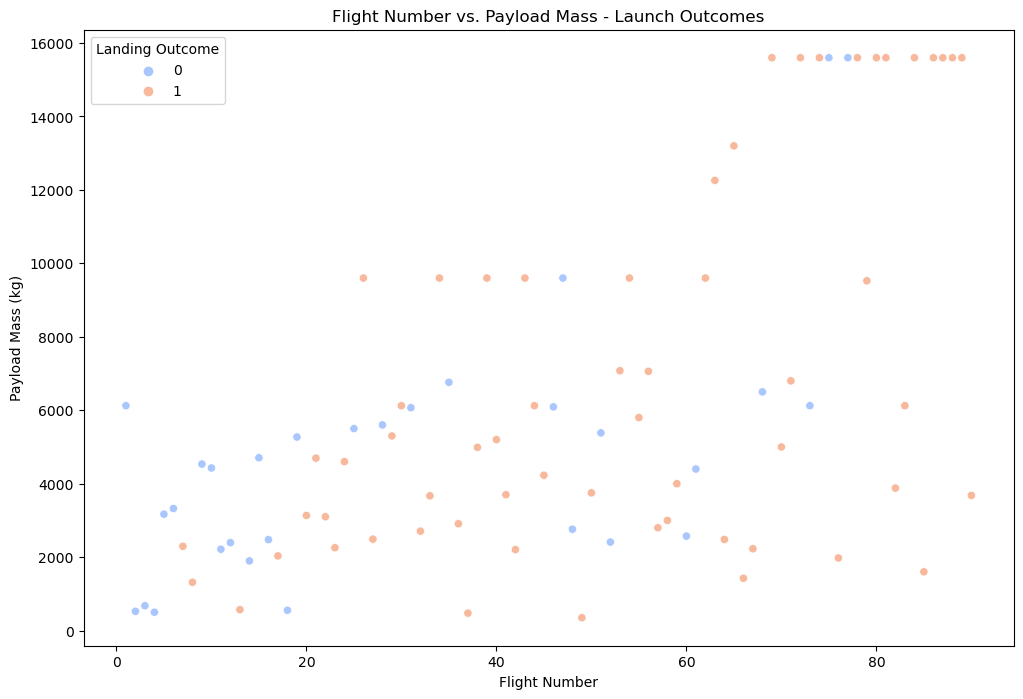

In [221]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='FlightNumber', y='PayloadMass', hue='Class', data=data_falcon9, palette='coolwarm')
plt.title('Flight Number vs. Payload Mass - Launch Outcomes')
plt.xlabel('Flight Number')
plt.ylabel('Payload Mass (kg)')
plt.legend(title='Landing Outcome')
plt.show()

 CCAFS LC-40 exhibits a success rate of 60%, whereas KSC LC-39A and VAFB SLC 4E achieve higher success rates at 77%.

<Figure size 1200x800 with 0 Axes>

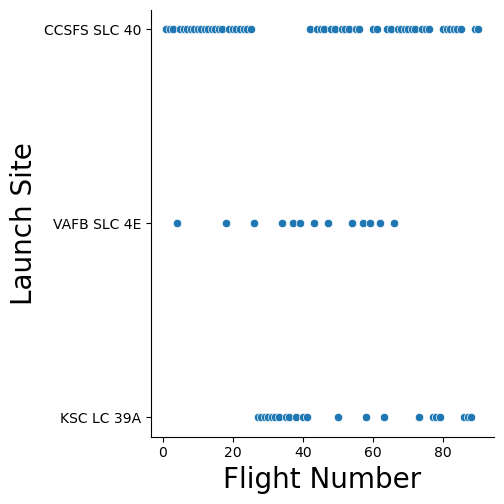

In [222]:
#Visualise the relationship between Flight Numbert and Lunch site
plt.figure(figsize=(12, 8))
sns.relplot(y="LaunchSite", x="FlightNumber", data=data_falcon9)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

<Figure size 1200x800 with 0 Axes>

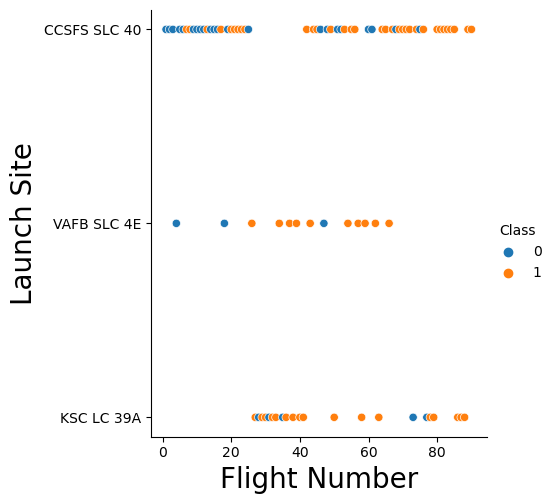

In [223]:
#Visualise the relationship between Flight Numbert and Lunch site
plt.figure(figsize=(12, 8))
sns.relplot(y="LaunchSite", x="FlightNumber", data=data_falcon9, hue = "Class")
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

<Figure size 1200x800 with 0 Axes>

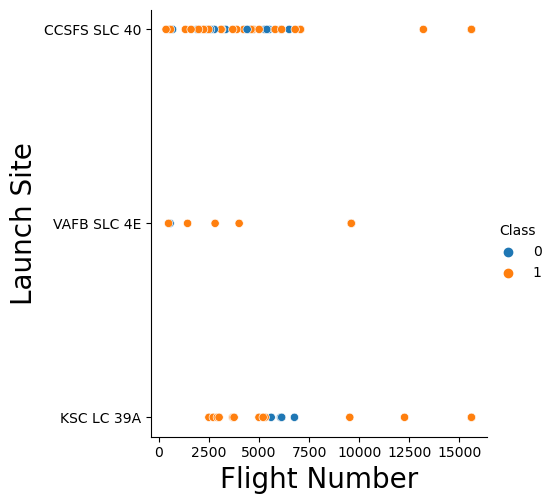

In [224]:
#Visualise the relationship between Pay Load Mass (kg) and Lunch site
plt.figure(figsize=(12, 8))
sns.relplot(y="LaunchSite", x="PayloadMass", data=data_falcon9, hue = "Class")
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

In [225]:
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


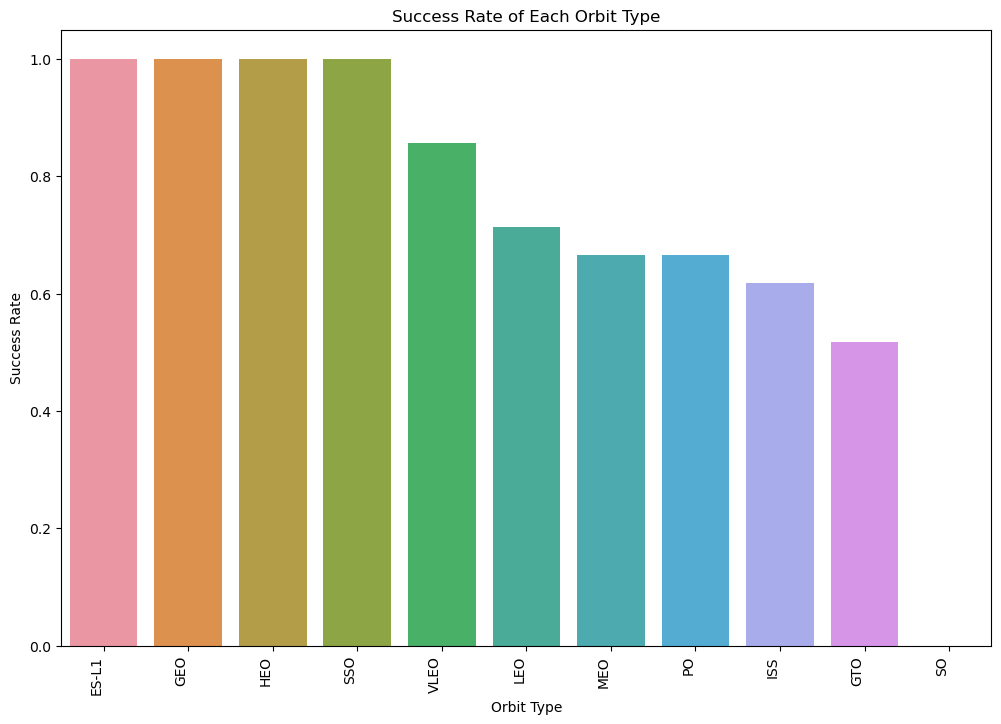

In [226]:
# Calculate success rates for each orbit type
orbit_success_rates = data_falcon9.groupby('Orbit')['Class'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=orbit_success_rates.index, y=orbit_success_rates.values)
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=90, ha='right')
plt.show()


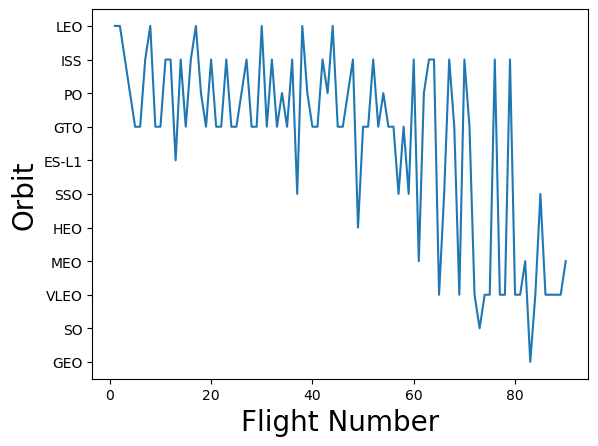

In [227]:
### Visualize the relationship between FlightNumber and Orbit type
sns.lineplot(y="Orbit", x="FlightNumber",data=data_falcon9)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()


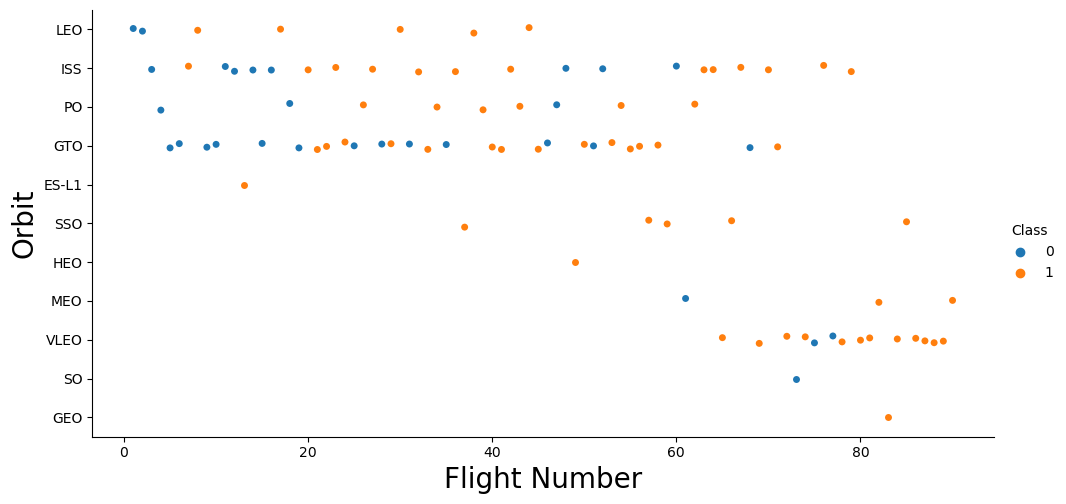

In [228]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=data_falcon9,aspect=2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

The analysis observes a potential relationship between the success rate in Low Earth Orbit (LEO) and the number of flights. Specifically, in the LEO orbit, there appears to be a correlation where success is related to the increasing number of flights. However, in the Geostationary Transfer Orbit (GTO), there is no discernible relationship between flight number and success.






In [229]:
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


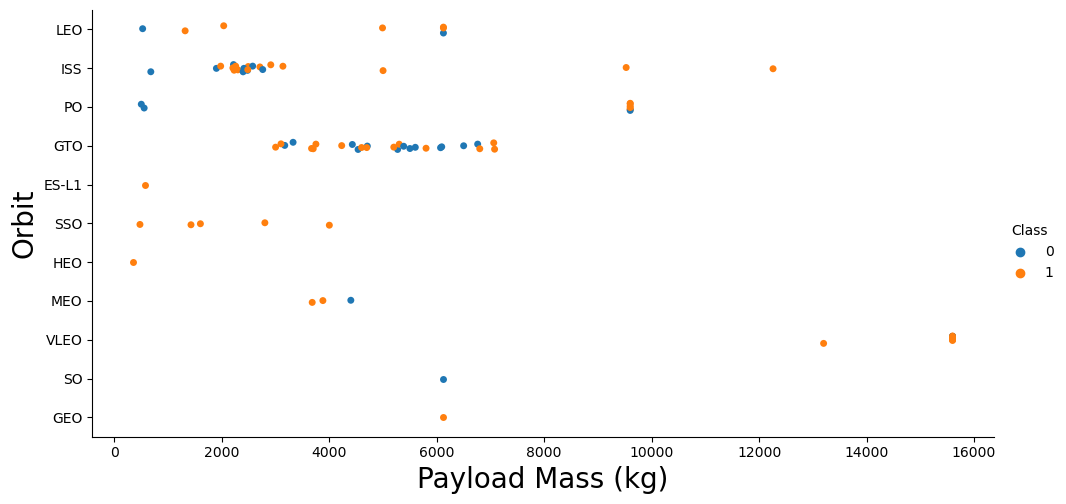

In [230]:
### Visualize the relationship between Payload and Orbit type

# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=data_falcon9,aspect=2)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

The analysis reveals that for heavy payloads, there is a higher success rate or positive landing rate for Polar, Low Earth Orbit (LEO), and International Space Station (ISS) orbits. In contrast, distinguishing this pattern is challenging for Geostationary Transfer Orbit (GTO) due to the coexistence of both positive and negative landing outcomes, making the relationship less distinct.






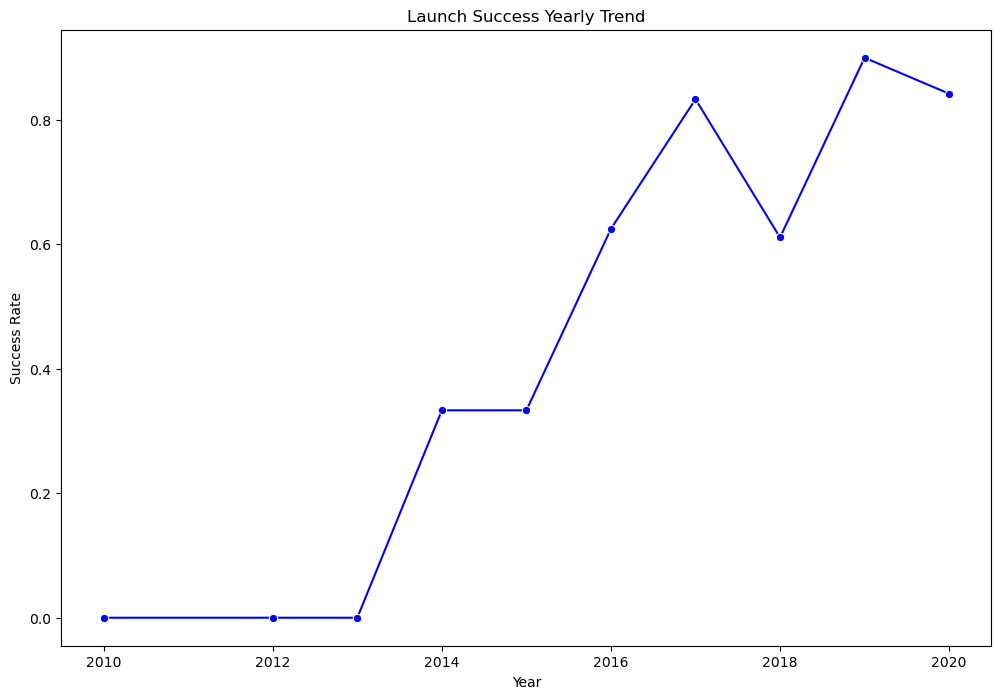

In [231]:
# Convert 'Date' column to datetime format
data_falcon9['Date'] = pd.to_datetime(data_falcon9['Date'])

# Extracting the year from the 'Date' column
data_falcon9['Year'] = data_falcon9['Date'].dt.year

# Calculate the yearly success rate
yearly_success_rate = data_falcon9.groupby('Year')['Class'].mean()

# Plotting the line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x=yearly_success_rate.index, y=yearly_success_rate.values, marker='o', color='b')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

In [232]:
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1,2020
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1,2020
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1,2020
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1,2020


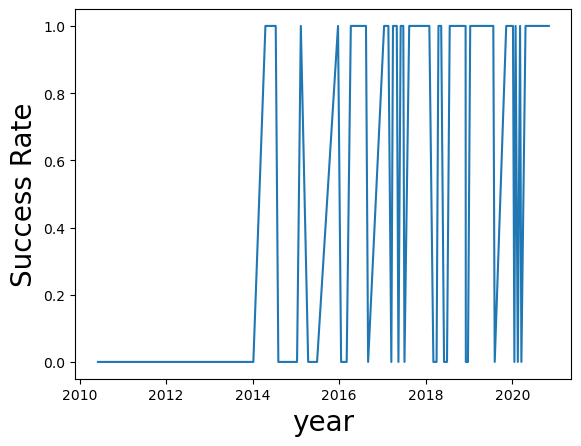

In [233]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(data=data_falcon9, x="Date", y="Class") 
plt.xlabel("year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

In [234]:
features = data_falcon9[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


To apply OneHotEncoder to the columns 'Orbits,' 'LaunchSite,' 'LandingPad,' and 'Serial,' the function get_dummies is used on the 'features' dataframe. The resulting dataframe, named 'features_one_hot,' contains all features, including the encoded ones. Below is a code snippet to achieve this:



In [235]:
### Create dummy variables to categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
features_one_hot.astype(float)


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Machine Learning Prediction

<b>Standardize Data:</b><br>
Utilize <code>StandardScaler</code> to standardize the dataset.<br><br>

<b>Split into Training and Test Sets:</b><br>
Use <code>train_test_split</code> to divide the standardized data into training and test sets.<br><br>

<b>Find Best Hyperparameters:</b><br>
For Support Vector Machine (SVM), Classification Trees, and Logistic Regression:
Utilize <code>GridSearchCV</code> to search for the best hyperparameters.<br><br>

<b>Evaluate and Compare Models:</b><br>
Evaluate SVM, Classification Trees, and Logistic Regression models on the test data.
Compare their performances to determine the best-performing method.


In [237]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [238]:
"""
    Plot the confusion matrix.

    Parameters:
        - y_true: true labels
        - y_pred: predicted labels
"""
# Define the plot_confusion_matrix function
def plot_confusion_matrix(y_true, y_pred, labels=['Did not land', 'Landed']):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels, rotation=0)
    plt.show()


In [239]:
# Create a NumPy array from the column 'Class'
Y = data_falcon9['Class'].to_numpy()
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (90, 83)
Y shape: (90,)


In [240]:
# Standardize the data
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [241]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(Y_test.shape)

(18,)


In [242]:
# Logistic Regression
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression(random_state=1)
logreg_cv = GridSearchCV(lr, parameters, cv=10, refit=True)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [243]:
# Print tuned hyperparameters and cross-validation accuracy
print("Tuned hyperparameters:", logreg_cv.best_params_)
print("Cross-validation accuracy:", logreg_cv.best_score_)

Tuned hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Cross-validation accuracy: 0.8464285714285713


Test set accuracy: 83.3%


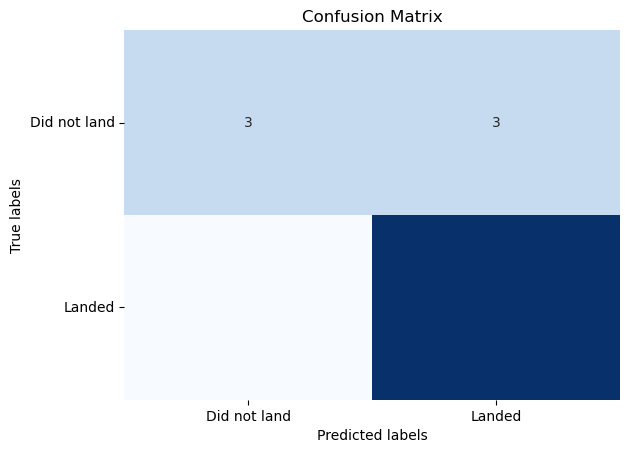

Examining the confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [244]:
# Calculate and print the accuracy on the test data
logreg_score = logreg_cv.score(X_test, Y_test)
print("Test set accuracy: {:.1%}".format(logreg_score))

# Predictions and confusion matrix
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


# Examining the confusion matrix
print("Examining the confusion matrix:")
print(classification_report(Y_test, yhat))


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.



Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.



In [245]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters).fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [246]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


score : 0.8333333333333334


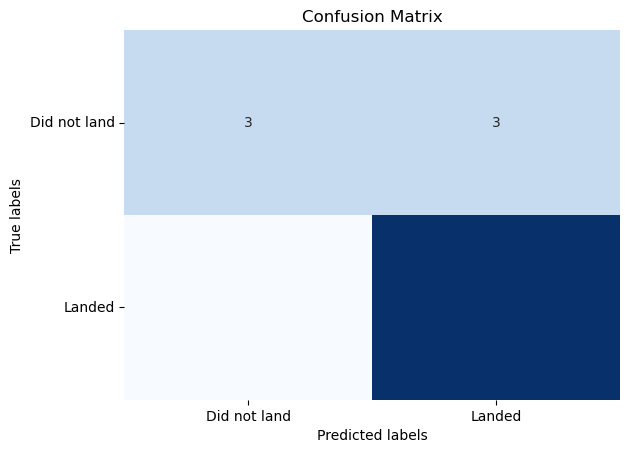

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [247]:
svm_cv_score = svm_cv.score(X_test, Y_test)
print("score :",svm_cv_score)
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
print(classification_report(Y_test, yhat))


Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.



In [248]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [249]:
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.875


score : 0.8333333333333334


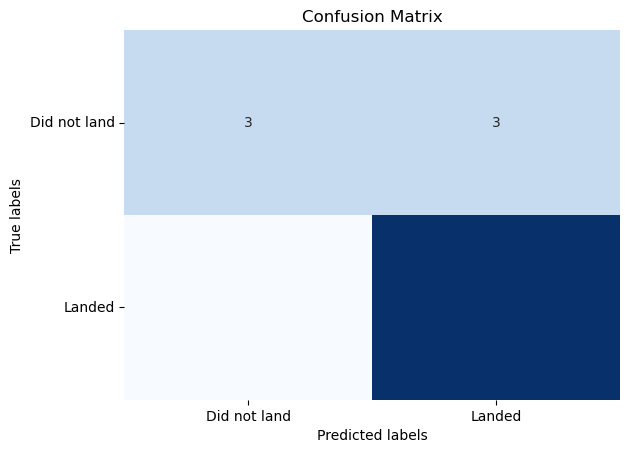

In [250]:
#Calculate the accuracy of tree_cv on the test data using the method score:
tree_cv_score = tree_cv.score(X_test, Y_test)  # Corrected line
print("score :", tree_cv_score)
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.



In [251]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN, cv=10, param_grid=parameters).fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Calculate the accuracy of knn_cv on the test data using the method score:



score : 0.8333333333333334


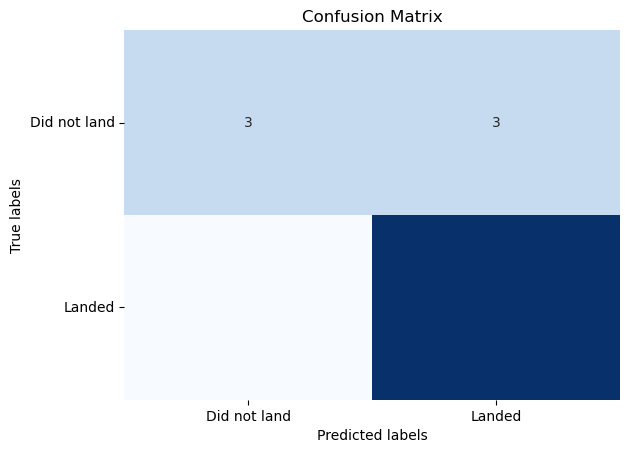

In [252]:
knn_cv_score = knn_cv.score(X_test, Y_test)
print("score :",knn_cv_score)
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [253]:
#Find the method performs best:


accuracy = [svm_cv_score, logreg_score, knn_cv_score, tree_cv_score]
accuracy = [i * 100 for i in accuracy]

method = ['Support Vector Machine', 'Logistic Regression', 'K Nearest Neighbour', 'Decision Tree']
models = {'ML Method':method, 'Accuracy Score (%)':accuracy}

ML_df = pd.DataFrame(models)
ML_df

,ML Method,Accuracy Score (%)
0,Support Vector Machine,83.333333
1,Logistic Regression,83.333333
2,K Nearest Neighbour,83.333333
3,Decision Tree,83.333333


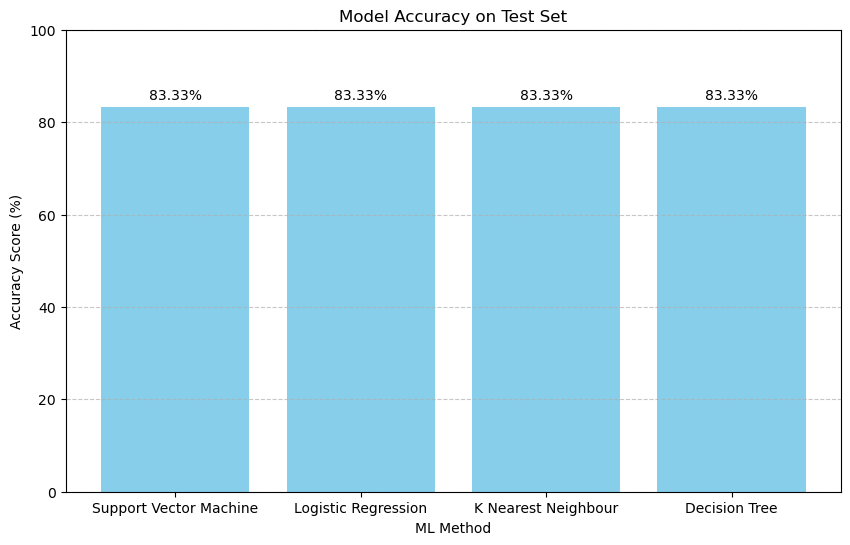

In [254]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ML_df['ML Method'], ML_df['Accuracy Score (%)'], color='skyblue')
plt.title('Model Accuracy on Test Set')
plt.xlabel('ML Method')
plt.ylabel('Accuracy Score (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100 for percentage values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the values on top of each bar
for i, value in enumerate(ML_df['Accuracy Score (%)']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()